In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Nvidia_stock_data.csv',parse_dates=['Date'],index_col='Date')

In [3]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


In [4]:
df['day']=df.index.day
df['month']=df.index.month
df['year']=df.index.year
df['day_of_week']=df.index.dayofweek
df['is_month_end']=df.index.is_month_end.astype(int)

In [5]:
# for col in df.columns:
for lag in [1,3,7,14]:
    df[f'Close_{lag}']=df['Close'].shift(lag)
df['Close_roll_mean_7']=df['Close'].rolling(window=7).mean()
df['Close_roll_std_7']=df['Close'].rolling(window=7).std()
df['Volume_roll_mean_7']=df['Close'].rolling(window=7).mean()

In [6]:
df['price_range']=df['High']-df['Low']
df['daily_return']=df['Close'].pct_change()
df['log_return']=np.log(df['Close']/df['Close'].shift(1))

In [7]:
df.head()

,Close,High,Low,Open,Volume,day,month,year,day_of_week,is_month_end,Close_1,Close_3,Close_7,Close_14,Close_roll_mean_7,Close_roll_std_7,Volume_roll_mean_7,price_range,daily_return,log_return
Date,,,,,,,,,,,,,,,,,,,,
1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000,22,1,1999,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009194,NaN,NaN
1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000,25,1,1999,0,0,0.037612,NaN,NaN,NaN,NaN,NaN,NaN,0.004417,0.104764,0.099632
1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000,26,1,1999,1,0,0.041552,NaN,NaN,NaN,NaN,NaN,NaN,0.005134,-0.077594,-0.080769
1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000,27,1,1999,2,0,0.038328,0.037612,NaN,NaN,NaN,NaN,NaN,0.003105,-0.003110,-0.003115
1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000,28,1,1999,3,0,0.038209,0.041552,NaN,NaN,NaN,NaN,NaN,0.000597,-0.003144,-0.003149


In [8]:
df.shape

(6637, 20)

In [9]:
df.isna().sum()

Close                  0
High                   0
Low                    0
Open                   0
Volume                 0
day                    0
month                  0
year                   0
day_of_week            0
is_month_end           0
Close_1                1
Close_3                3
Close_7                7
Close_14              14
Close_roll_mean_7      6
Close_roll_std_7       6
Volume_roll_mean_7     6
price_range            0
daily_return           1
log_return             1
dtype: int64

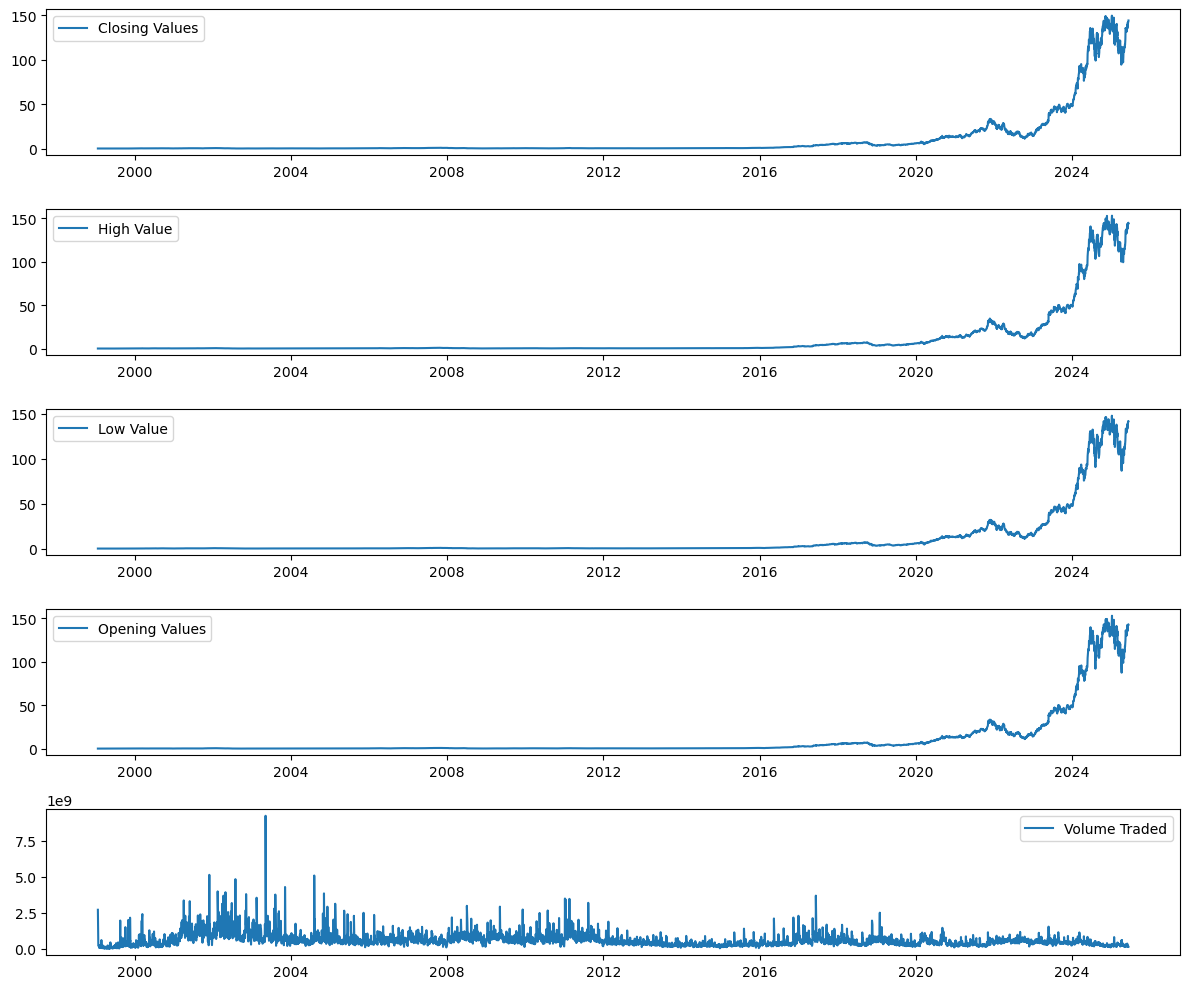

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

plt.subplot(511)
plt.plot(df.index,df['Close'],label='Closing Values')
plt.legend()

plt.subplot(512)
plt.plot(df.index,df['High'],label='High Value')
plt.legend()

plt.subplot(513)
plt.plot(df.index,df['Low'],label='Low Value')
plt.legend()

plt.subplot(514)
plt.plot(df.index,df['Open'],label='Opening Values')
plt.legend()

plt.subplot(515)
plt.plot(df.index,df['Volume'],label='Volume Traded')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
corr_mat=df.corr()
print(corr_mat)

                       Close      High       Low      Open    Volume  \
Close               1.000000  0.999787  0.999833  0.999566 -0.183755   
High                0.999787  1.000000  0.999755  0.999843 -0.182767   
Low                 0.999833  0.999755  1.000000  0.999777 -0.184546   
Open                0.999566  0.999843  0.999777  1.000000 -0.183462   
Volume             -0.183755 -0.182767 -0.184546 -0.183462  1.000000   
day                -0.000016  0.000295  0.000343  0.000739 -0.042496   
month              -0.012478 -0.012921 -0.011742 -0.012279 -0.066380   
year                0.553689  0.553539  0.553655  0.553311 -0.291808   
day_of_week        -0.000053  0.000257  0.000434  0.000776  0.058374   
is_month_end       -0.000747 -0.000693 -0.000865 -0.000929 -0.011886   
Close_1             0.999327  0.999640  0.999509  0.999734 -0.183677   
Close_3             0.998090  0.998514  0.998154  0.998442 -0.183490   
Close_7             0.996000  0.996528  0.995850  0.996259 -0.18

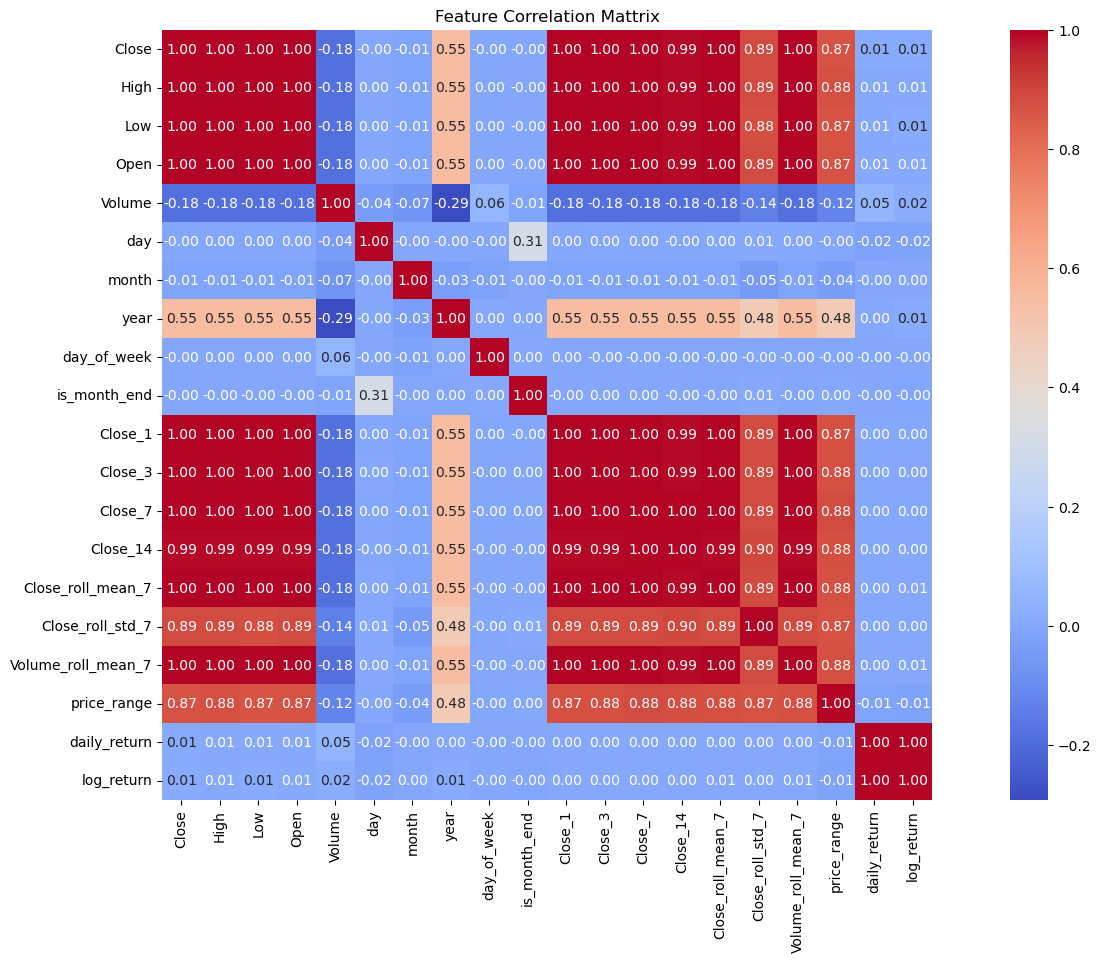

In [12]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.title('Feature Correlation Mattrix')
plt.show()

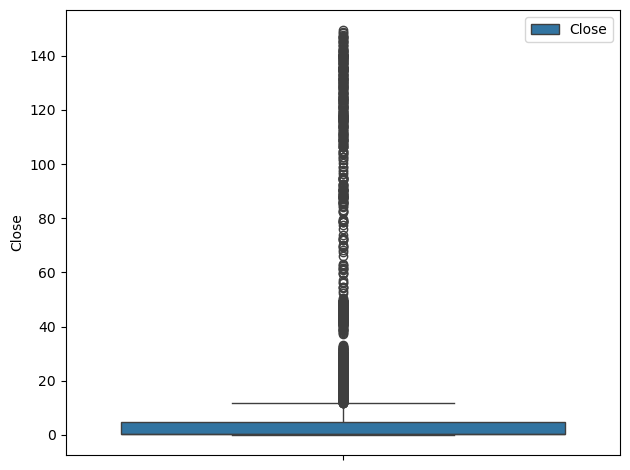

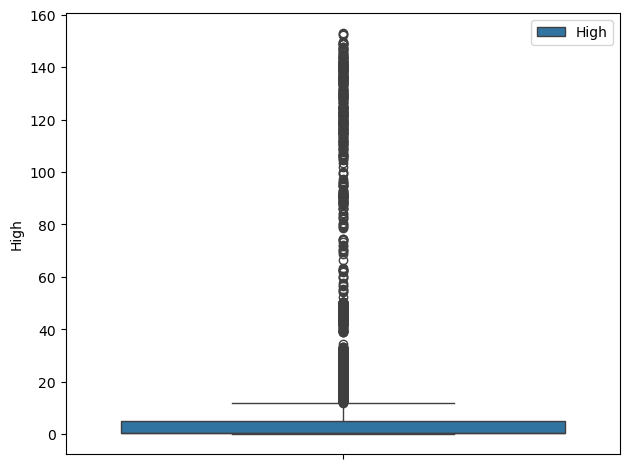

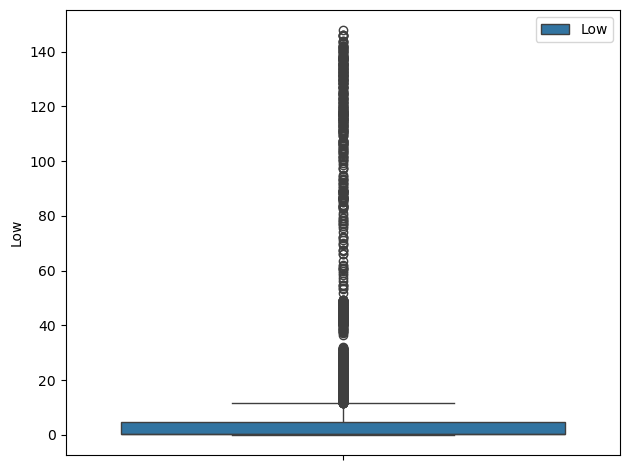

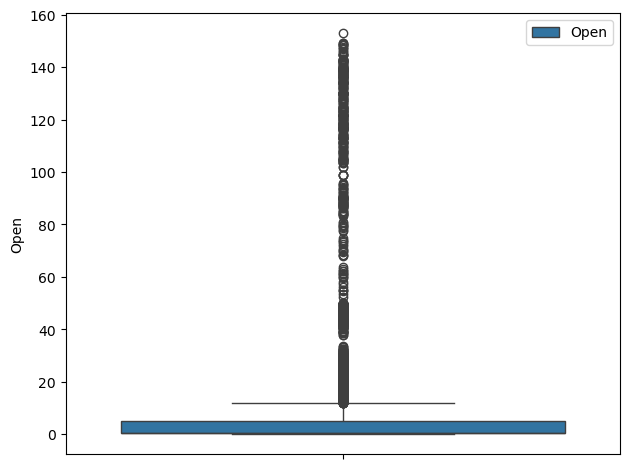

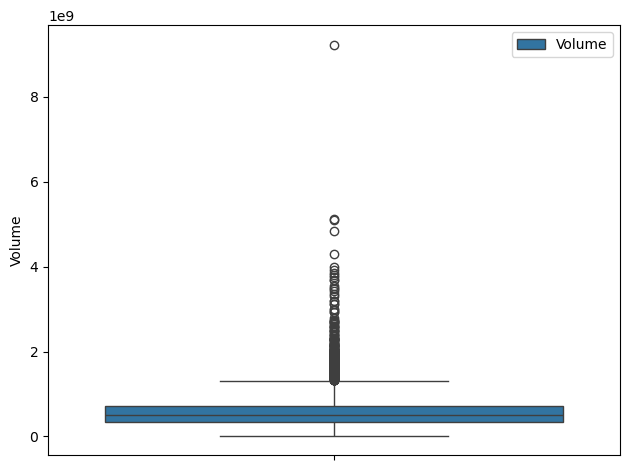

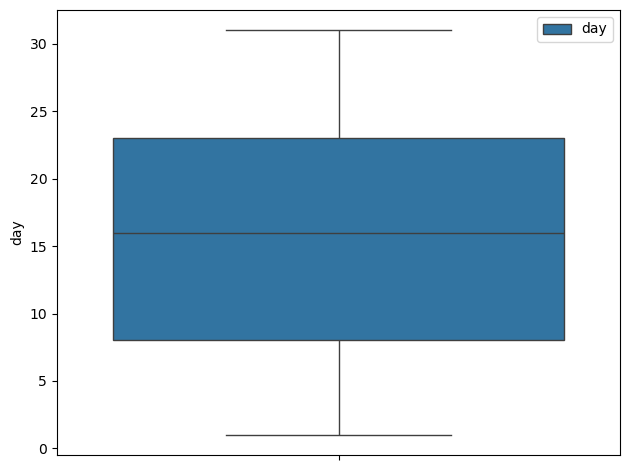

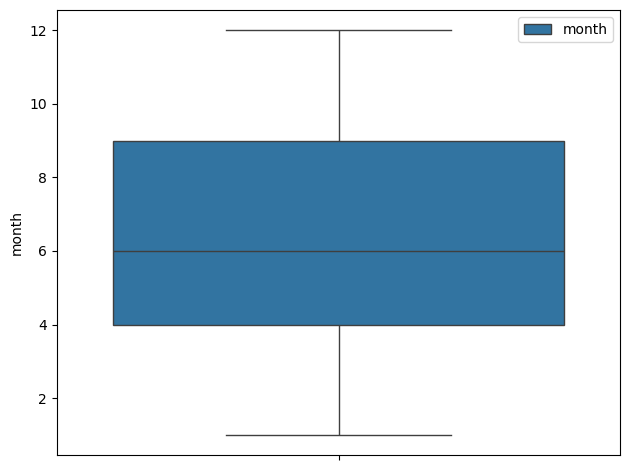

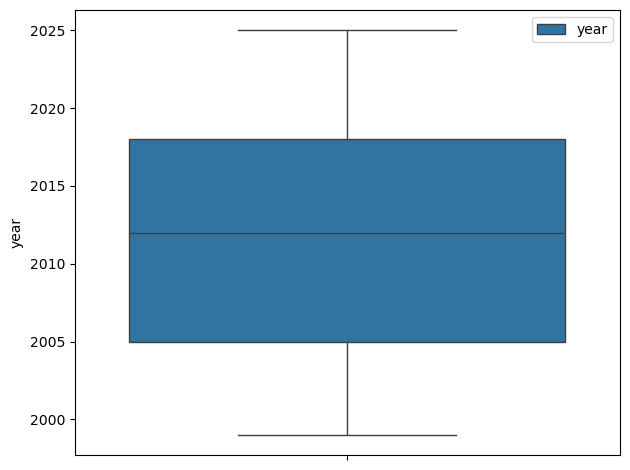

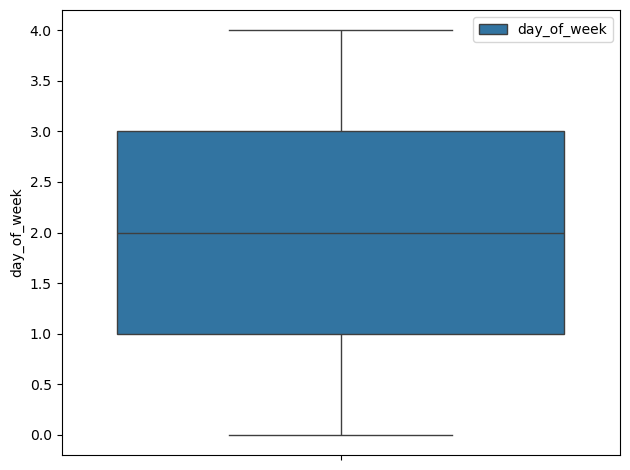

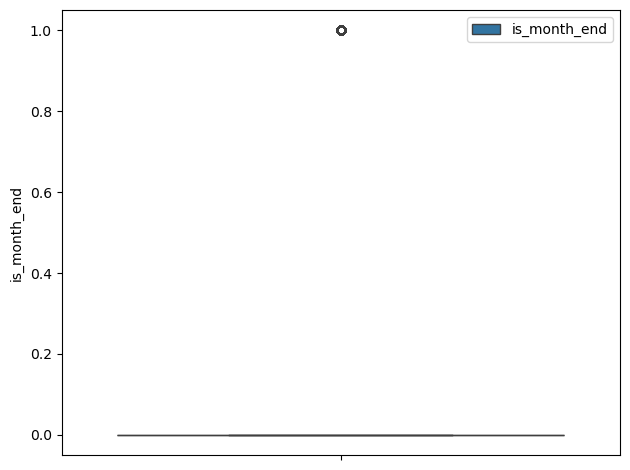

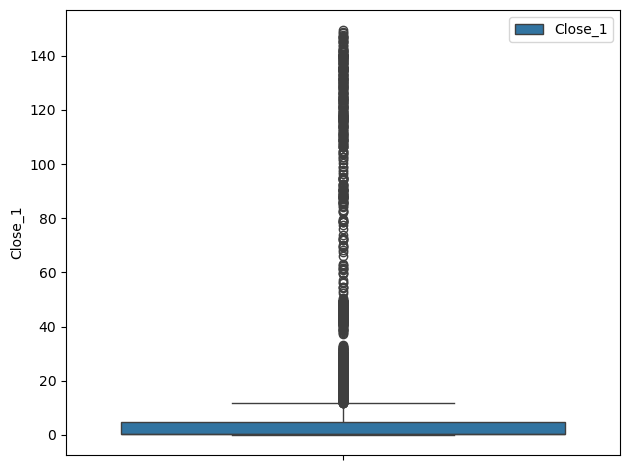

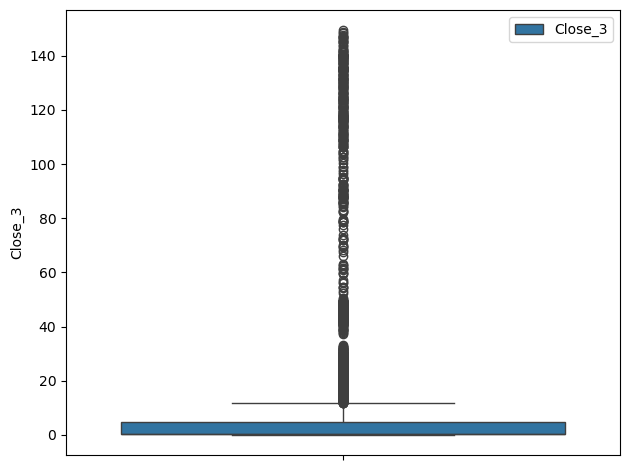

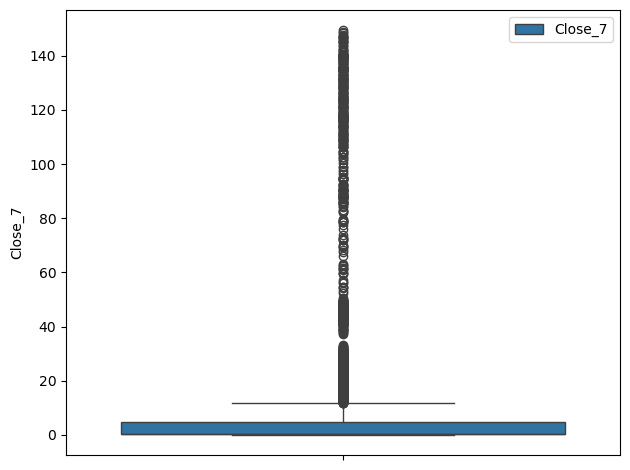

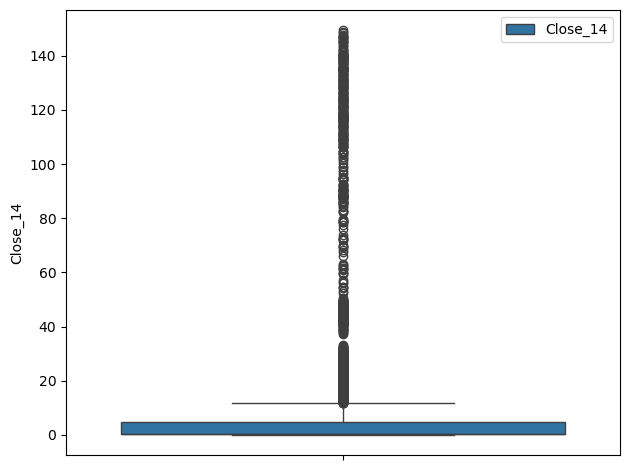

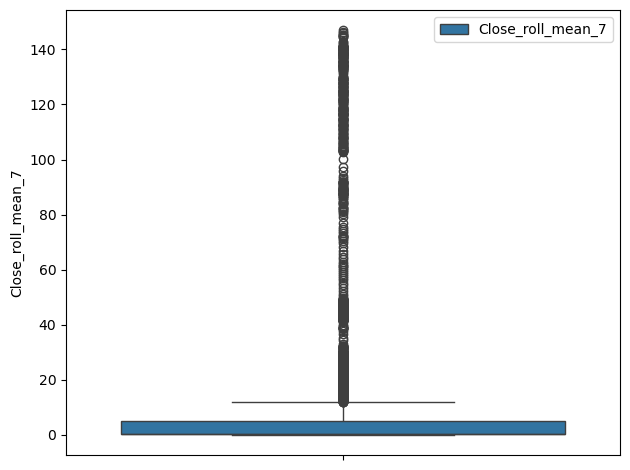

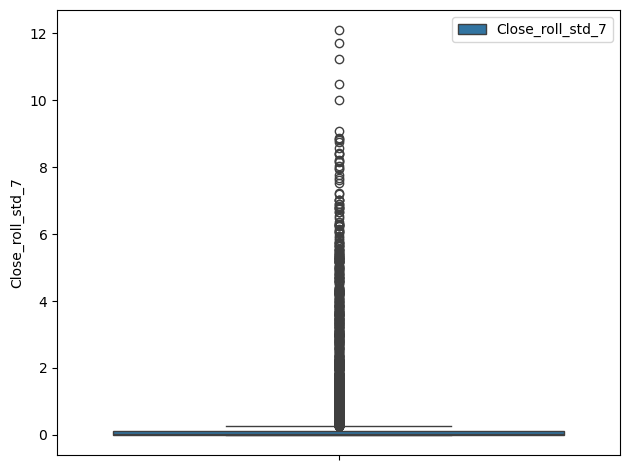

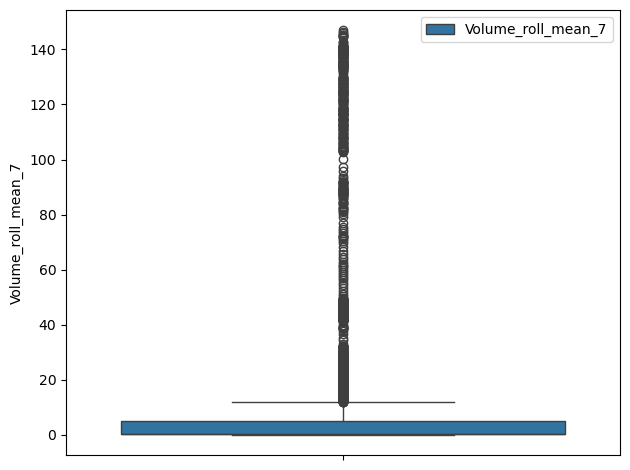

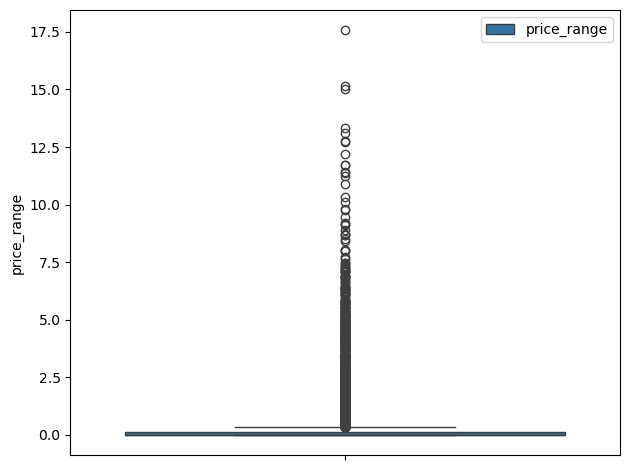

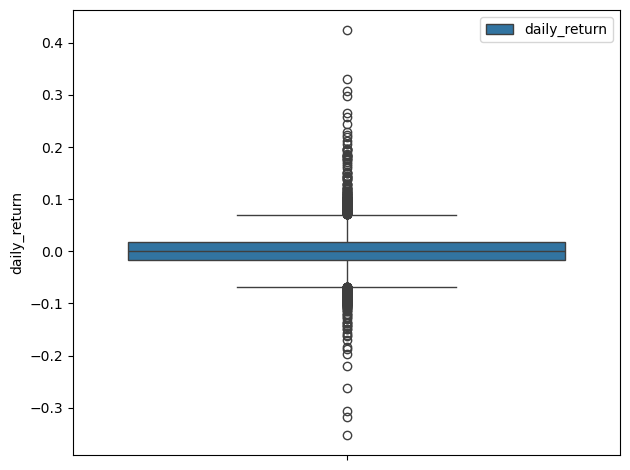

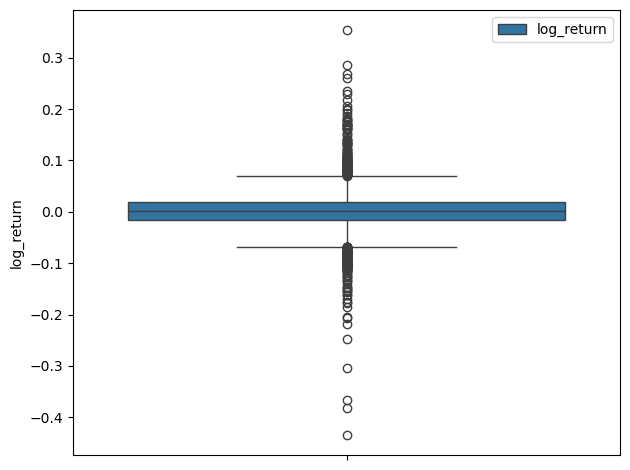

In [13]:
for col in df.columns:
    sns.boxplot(df[col],label=f'{col}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6637 entries, 1999-01-22 to 2025-06-10
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Close               6637 non-null   float64
 1   High                6637 non-null   float64
 2   Low                 6637 non-null   float64
 3   Open                6637 non-null   float64
 4   Volume              6637 non-null   int64  
 5   day                 6637 non-null   int32  
 6   month               6637 non-null   int32  
 7   year                6637 non-null   int32  
 8   day_of_week         6637 non-null   int32  
 9   is_month_end        6637 non-null   int64  
 10  Close_1             6636 non-null   float64
 11  Close_3             6634 non-null   float64
 12  Close_7             6630 non-null   float64
 13  Close_14            6623 non-null   float64
 14  Close_roll_mean_7   6631 non-null   float64
 15  Close_roll_std_7    6631 non-null   f

In [15]:
# from sklearn.preprocessing import RobustScaler
# cols=['day','month','year','day_of_week','is_month_end']
# cols_to_scale = [col for col in df.columns if col not in cols and pd.api.types.is_numeric_dtype(df[col])]
# df_to_scale=df[cols_to_scale]
# df_excluded=df[cols]

In [16]:
# scaler=RobustScaler()
# scaled_values = scaler.fit_transform(df_to_scale)

# # Step 4: Create a new DataFrame with scaled values
# df_scaled = pd.DataFrame(scaled_values, columns=cols_to_scale, index=df.index)
# df_final = pd.concat([df_scaled, df_excluded], axis=1)

# # Optional: preserve column order
# df_final = df_final[df.columns]

In [17]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

In [18]:
df.isna().sum()

Close                   0
High                    0
Low                     0
Open                    0
Volume                  0
day                     0
month                   0
year                    0
day_of_week             0
is_month_end            0
Close_1                 1
Close_3                 3
Close_7                 7
Close_14               14
Close_roll_mean_7       6
Close_roll_std_7        6
Volume_roll_mean_7      6
price_range             0
daily_return            1
log_return              1
MA50                   49
MA200                 199
dtype: int64

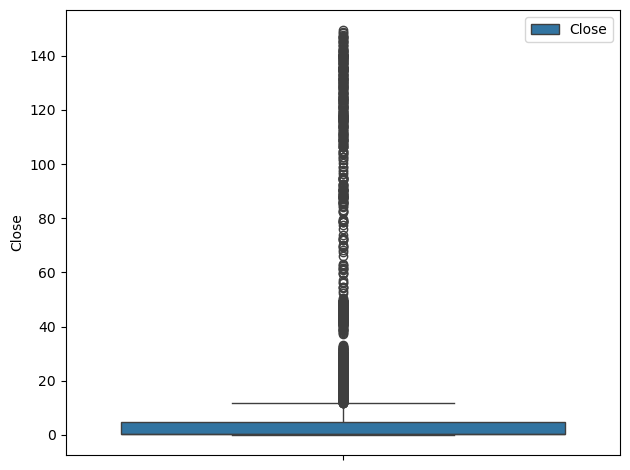

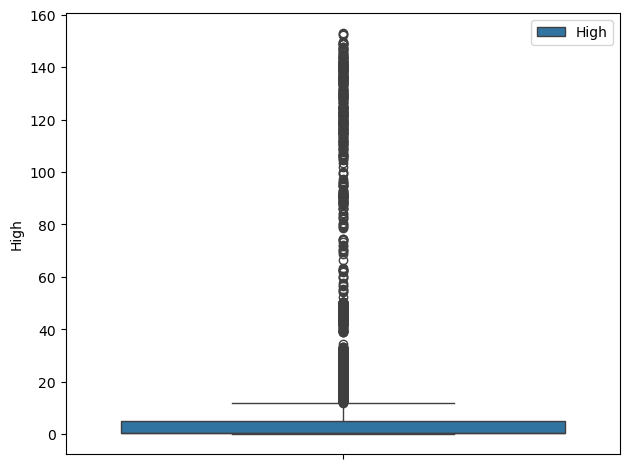

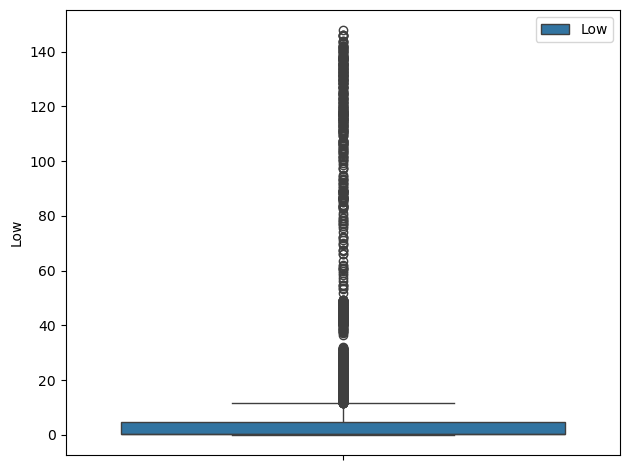

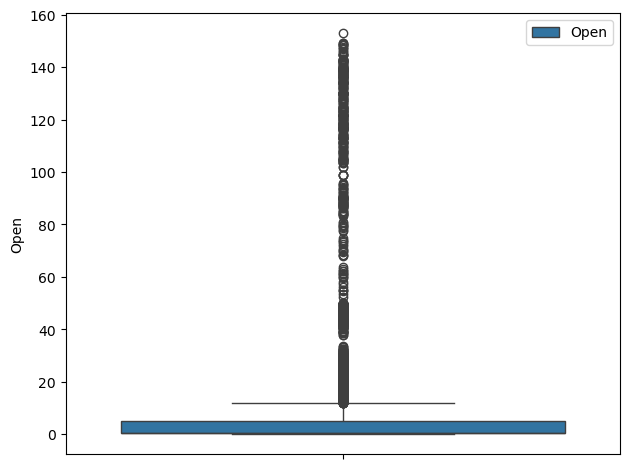

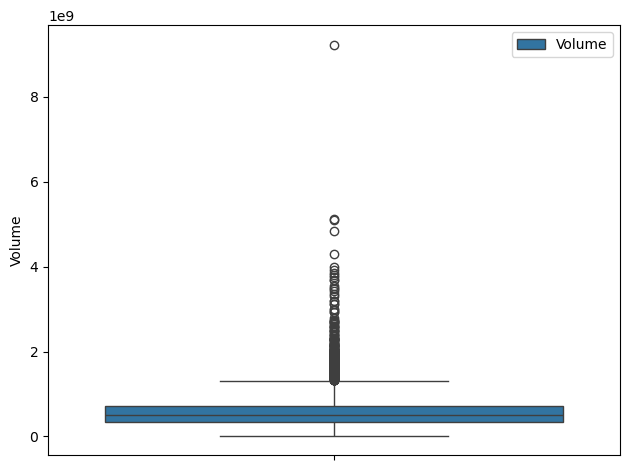

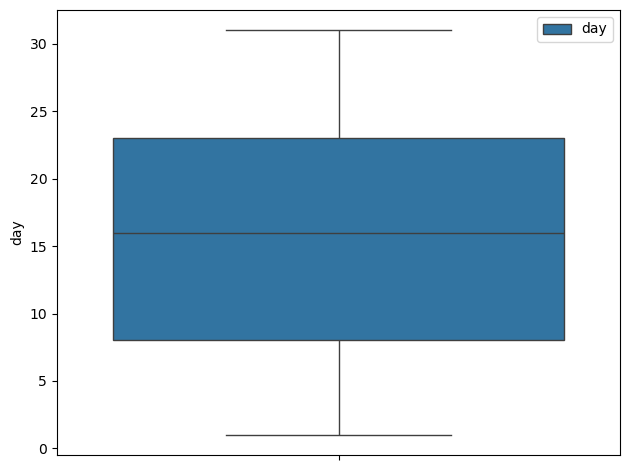

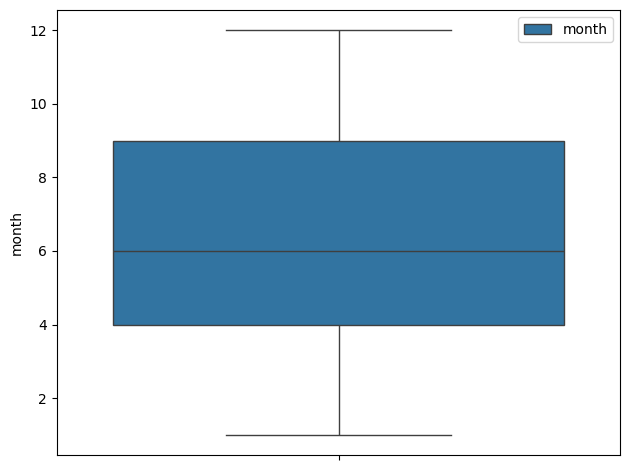

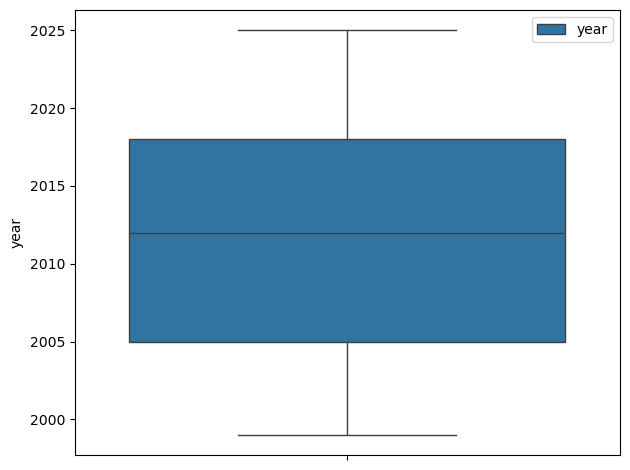

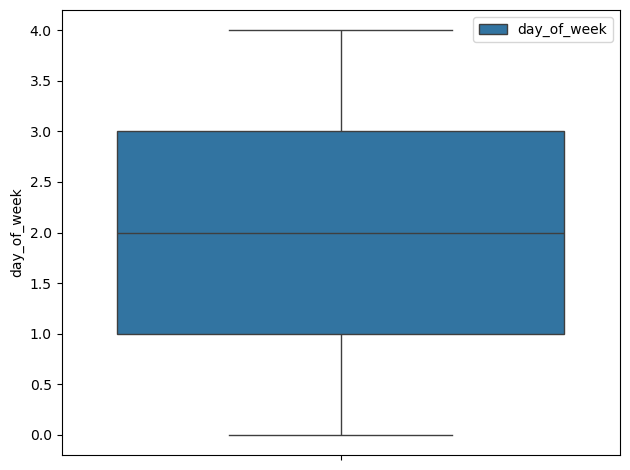

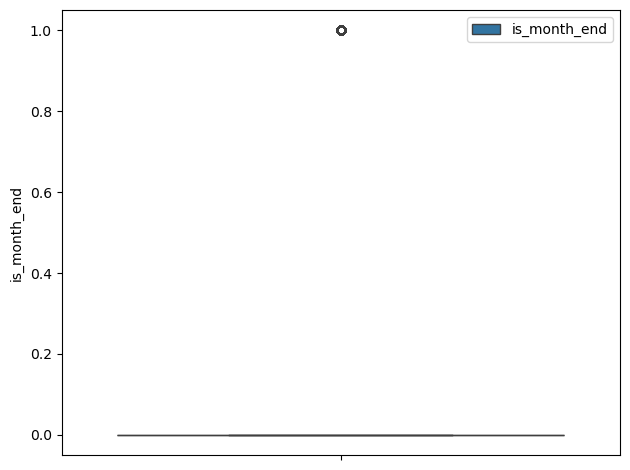

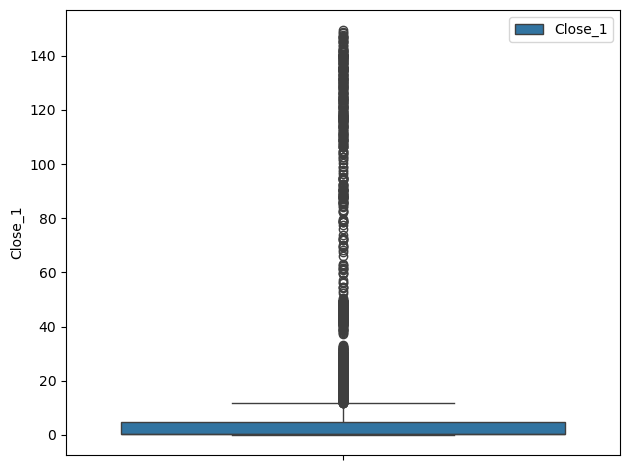

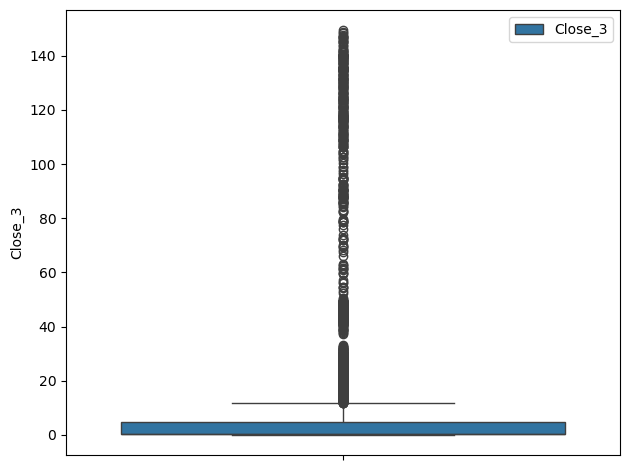

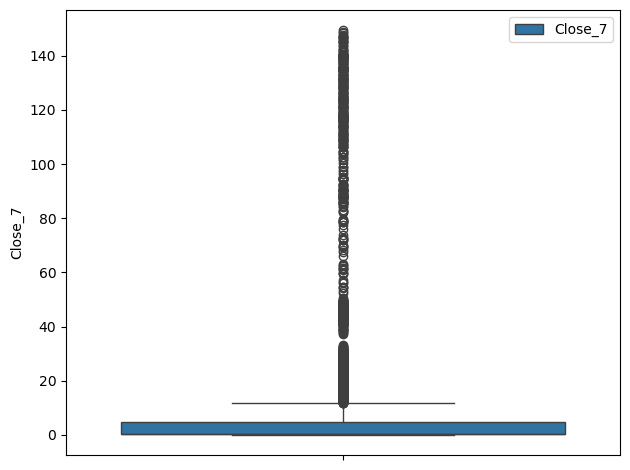

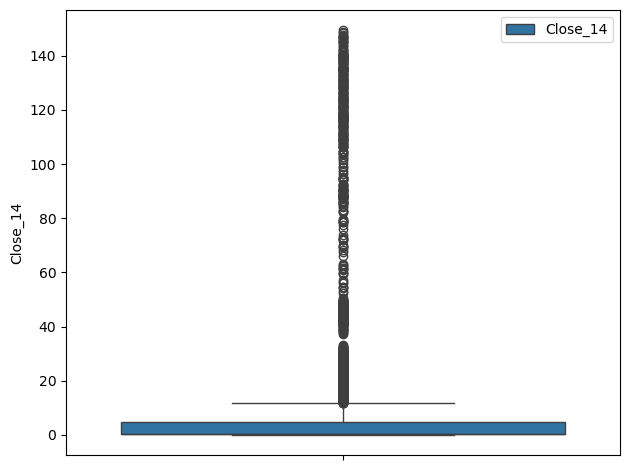

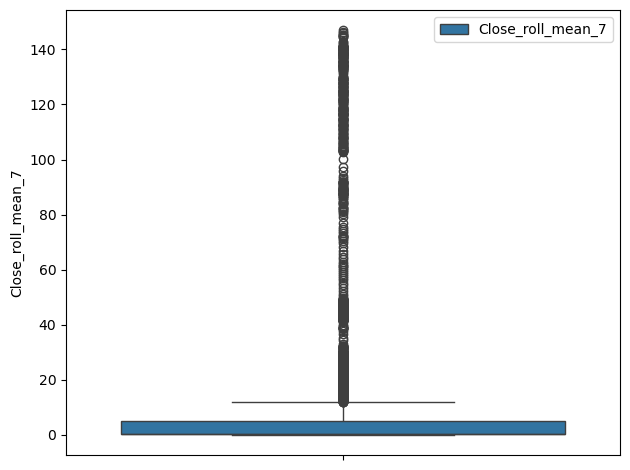

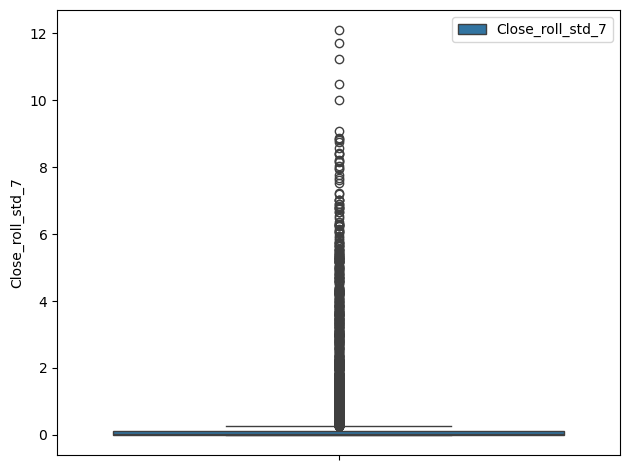

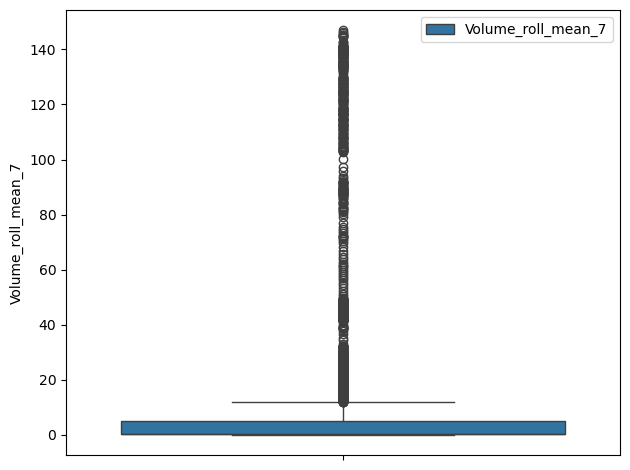

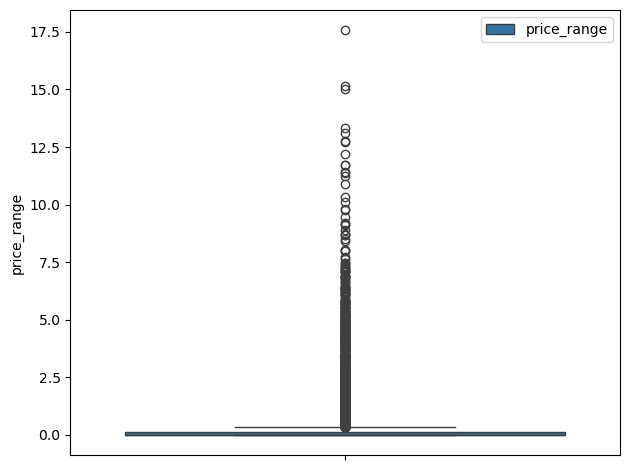

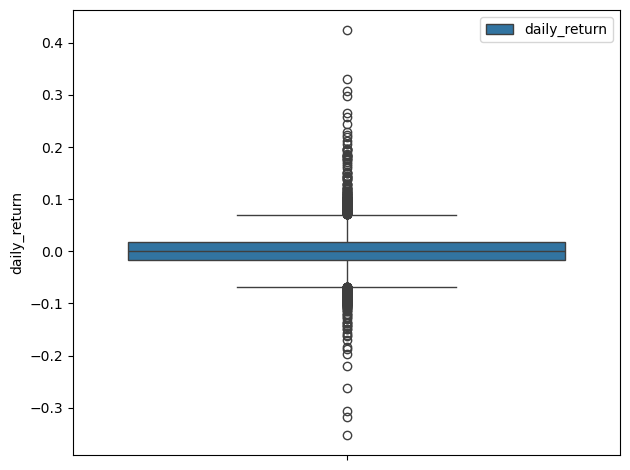

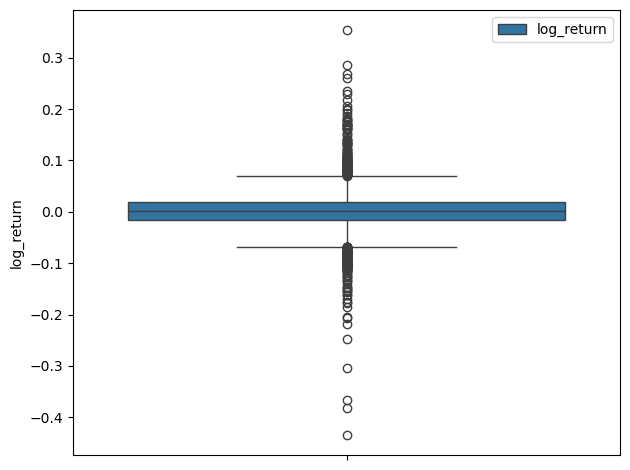

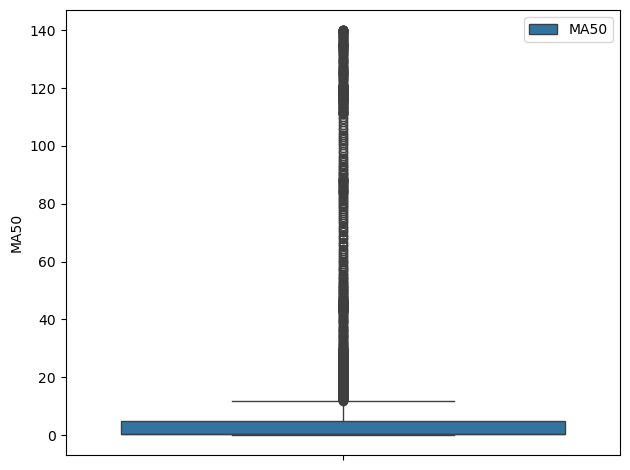

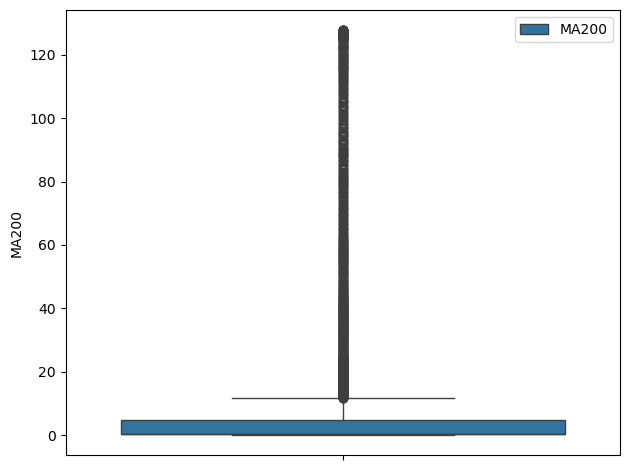

In [19]:
for col in df.columns:
    sns.boxplot(df[col],label=f'{col}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [20]:
# df_scaled.head()

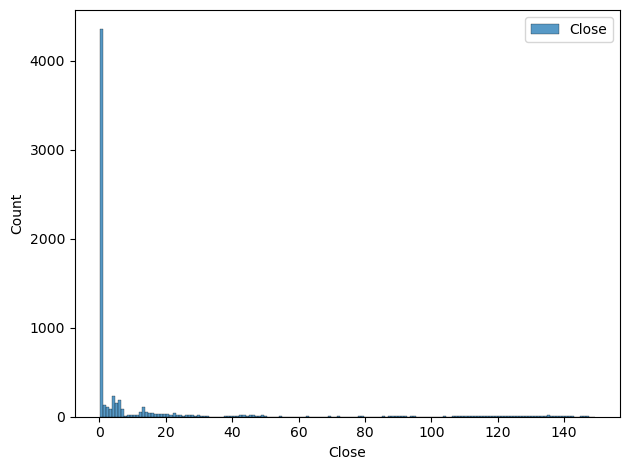

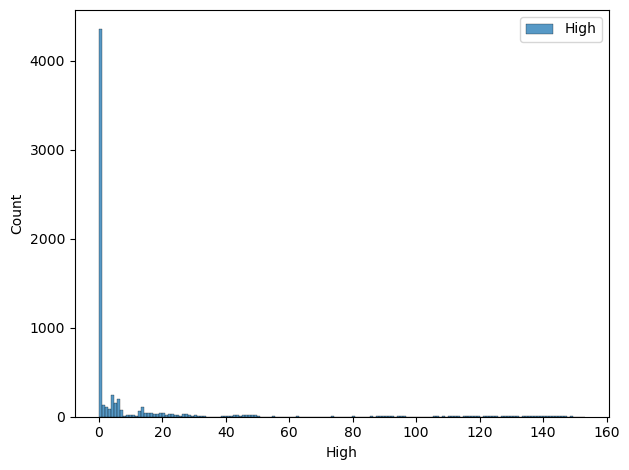

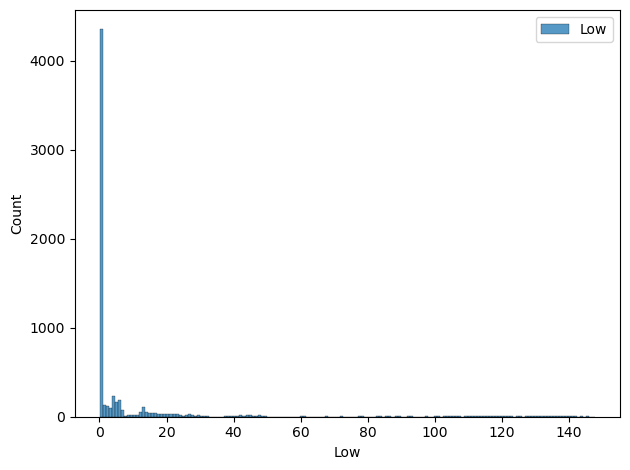

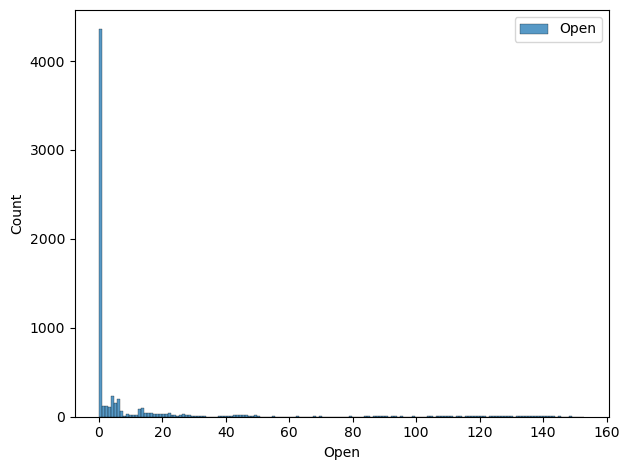

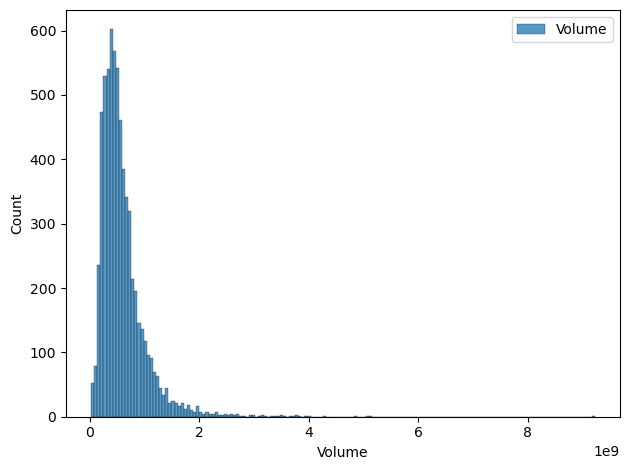

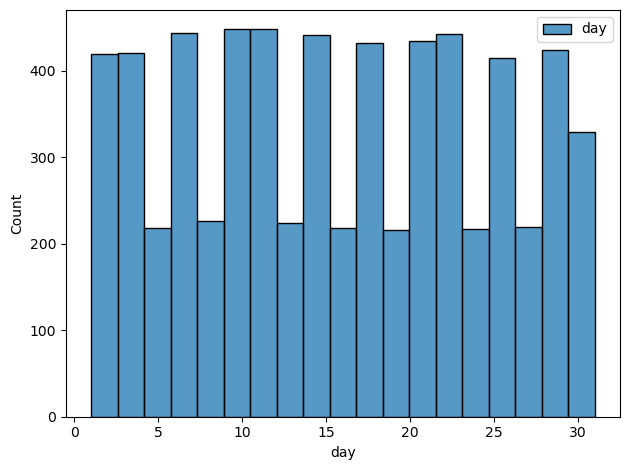

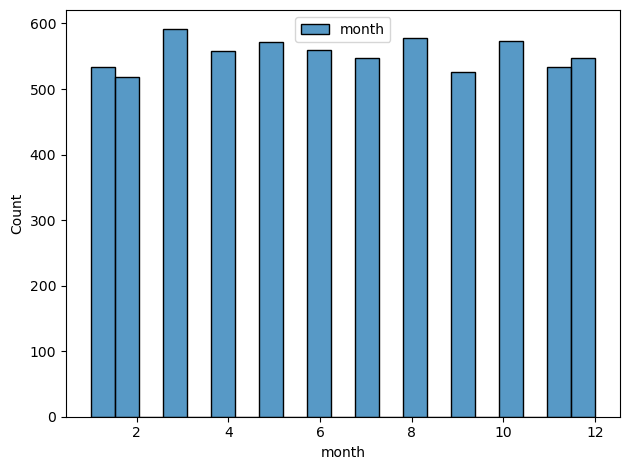

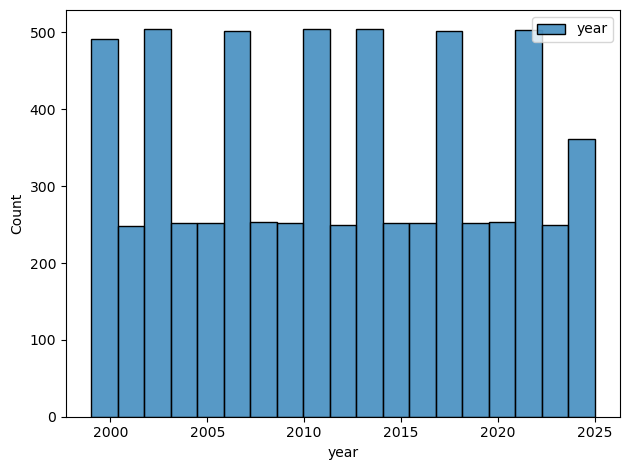

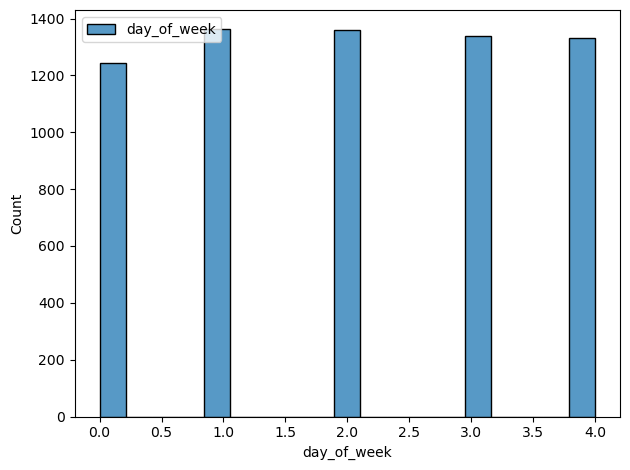

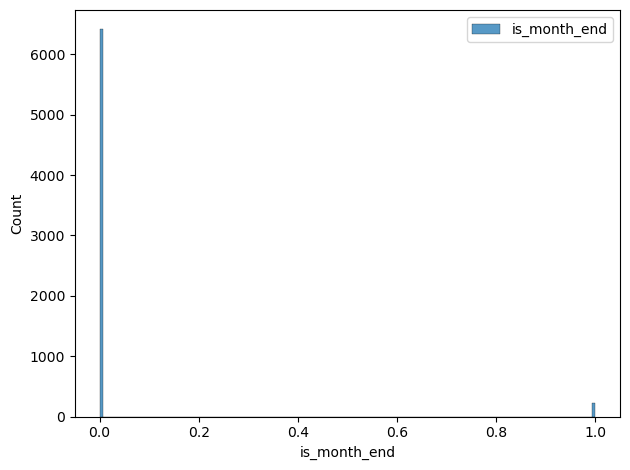

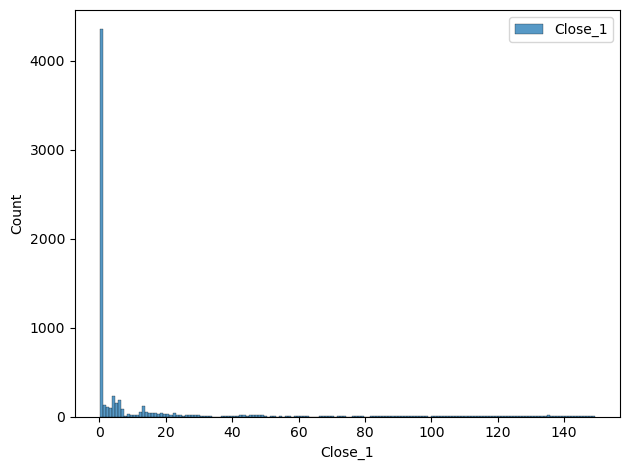

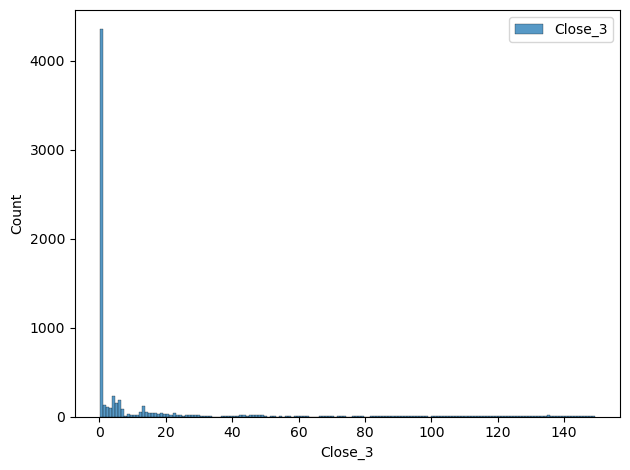

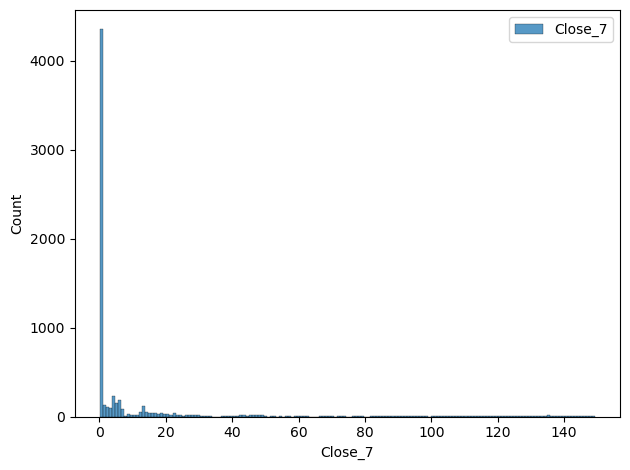

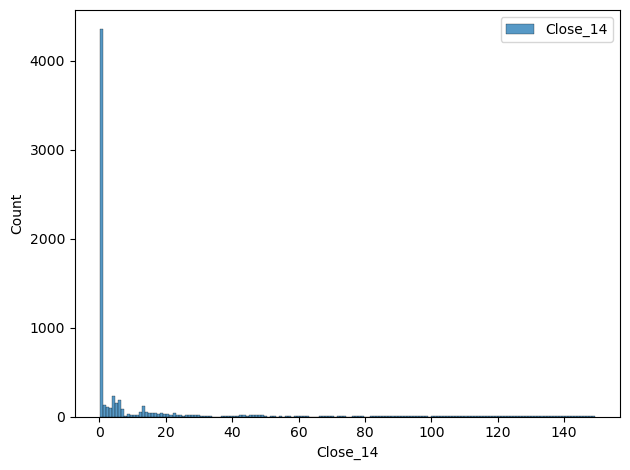

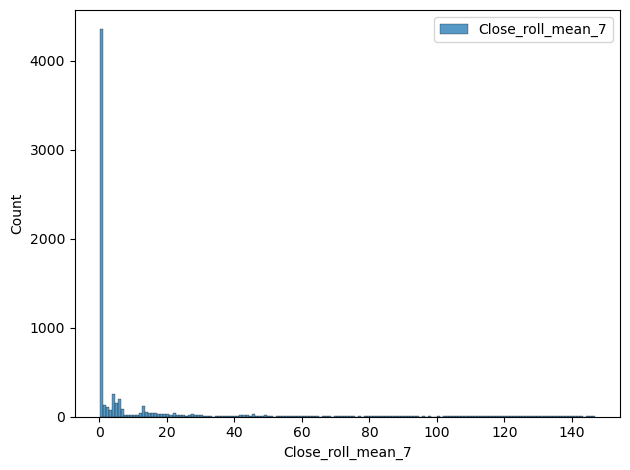

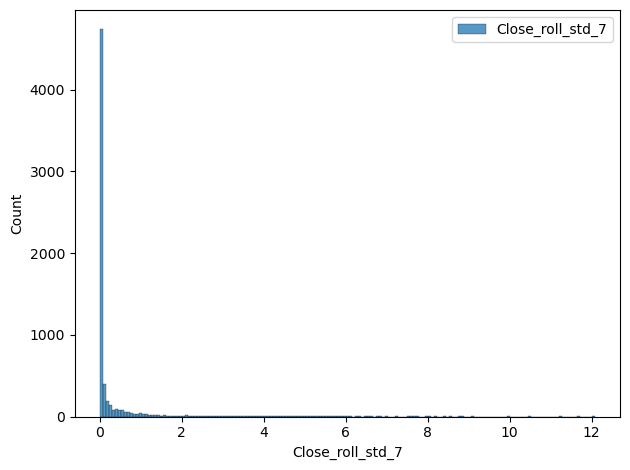

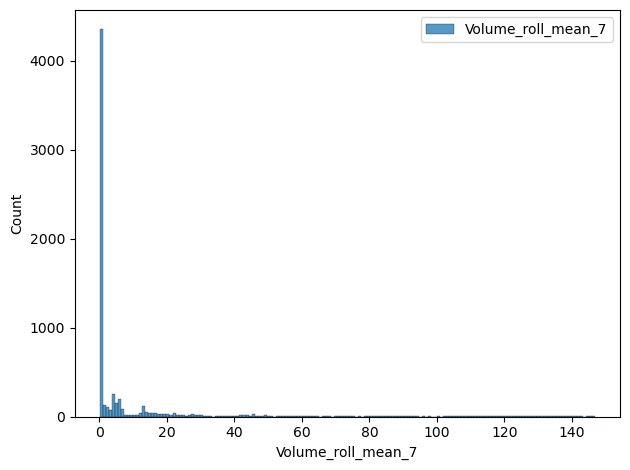

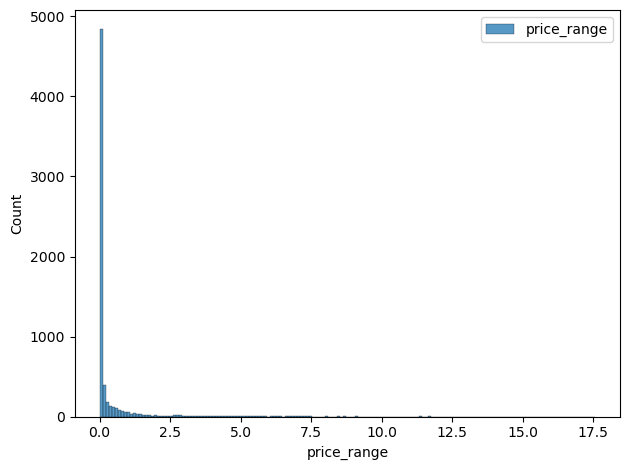

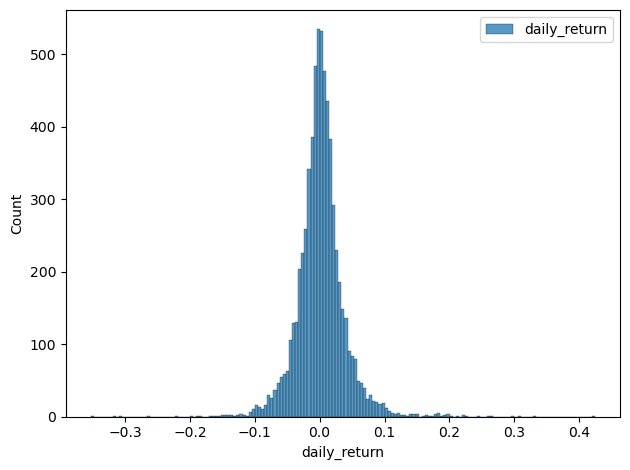

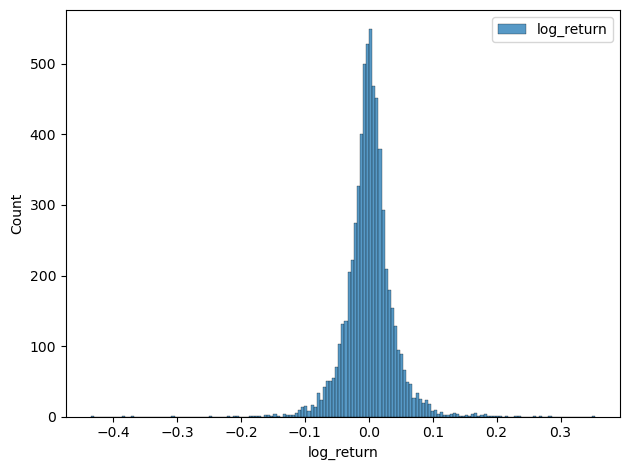

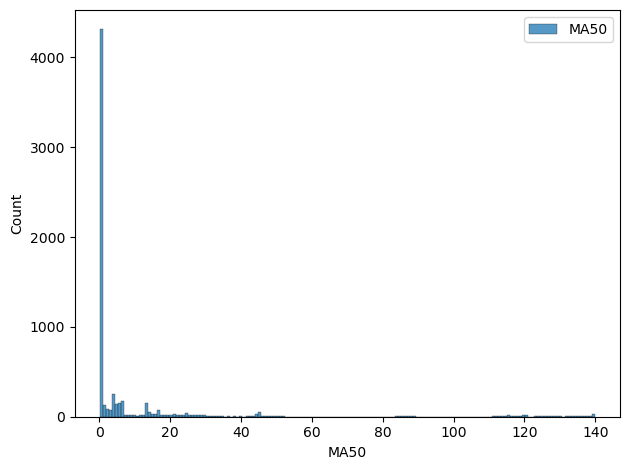

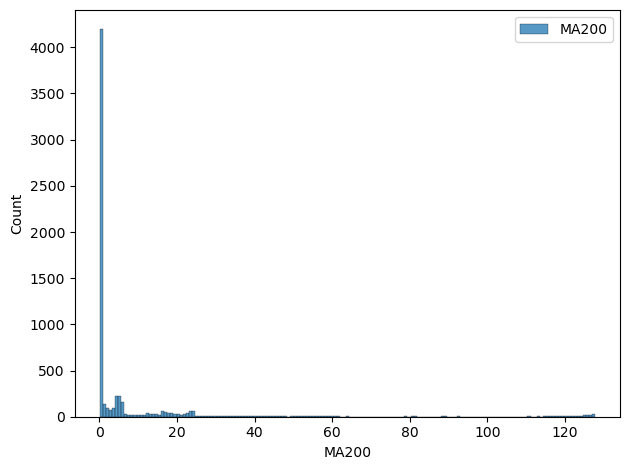

In [21]:
for col in df.columns:
    sns.histplot(df[col],label=f'{col}')
    plt.legend()
    plt.tight_layout()
    plt.show()

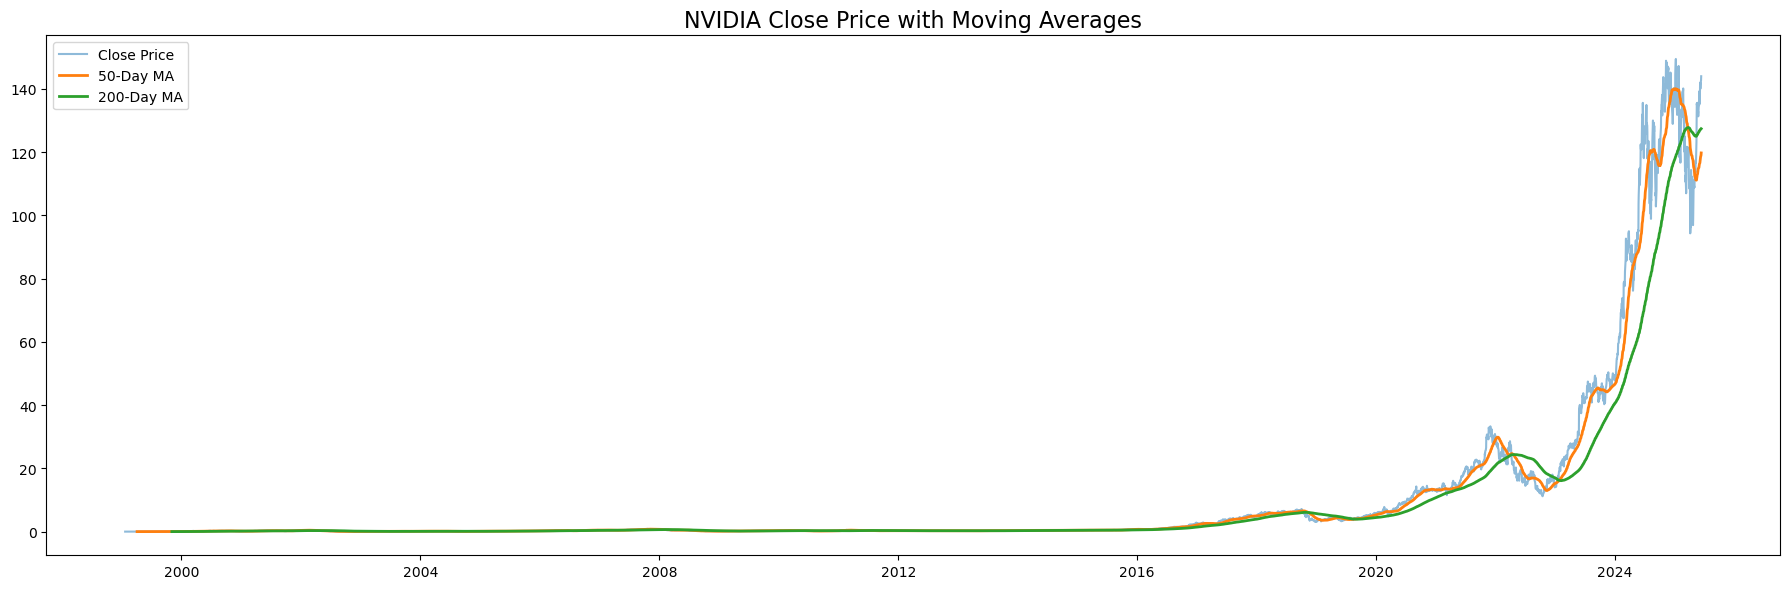

In [22]:
plt.figure(figsize=(18, 6))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
plt.plot(df.index, df['MA50'], label='50-Day MA', linewidth=2)
plt.plot(df.index, df['MA200'], label='200-Day MA', linewidth=2)
plt.title("NVIDIA Close Price with Moving Averages", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

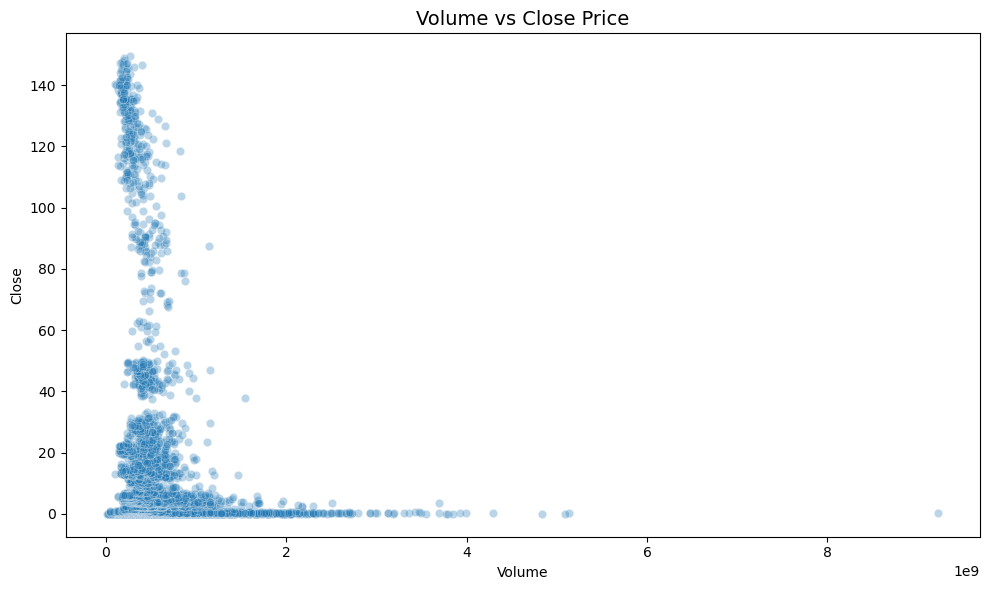

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.3)
plt.title("Volume vs Close Price", fontsize=14)
plt.tight_layout()
plt.show()

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,LSTM,Dense,RepeatVector,TimeDistributed,Concatenate

In [30]:
from sklearn.preprocessing import MinMaxScaler


In [40]:
# Normalize the close prices
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df[['Close']])

# Create LSTM sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X_lstm, y_lstm = create_sequences(scaled_close, seq_length)

# Split
X_train_dl = X_lstm[:-500]
y_train_dl = y_lstm[:-500]
X_test_dl = X_lstm[-500:]
y_test_dl = y_lstm[-500:]

# Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X_train_dl, y_train_dl, epochs=10, batch_size=128, verbose=1)

# Predict
y_pred_dl = model.predict(X_test_dl)
y_pred_dl_inv = scaler.inverse_transform(y_pred_dl)

C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 5.9520e-04
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 1.6739e-05
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 1.5162e-05
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 1.6461e-05
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.3188e-05
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 1.4573e-05
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 1.5592e-05
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 1.1936e-05
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 1.3001e-05
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.4126e-05
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step 


In [ ]:
# model.summary()

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(
#     monitor='val_loss',      # what to monitor
#     patience=5,              # stop if no improvement after 5 epochs
#     restore_best_weights=True  # restore weights from the best epoch
# )


In [ ]:
# history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),callbacks=[early_stopping],verbose=1)

In [ ]:
# y_pred_dl = model.predict(X_test_dl)
# y_pred_dl_inv = scaler.inverse_transform(y_pred_dl)